# Assignment 2 - Kaggle Survey Regression - Bryan Tarras

Below is my submission for assignment 2. The purpose of which will be to evaluate various regression models on the Kaggle Data set and ultiamtely tune and select the best performing algorithm.

Please note that any accuracies discussed in the written portions of this notebook were based on the results of the current run. These will vary slightly each time the notebook is run due to the randomization of the train_test_split.

### 1.0 Data Cleaning

To start lets import the relevant libraires. Note that I have commented out the install of the various libraries (assuming that the system running this will already have the libaries installed).

In [1]:
#!pip install numpy
import numpy as np
#!pip install pandas
import pandas as pd
#!pip install sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error, confusion_matrix

from sklearn.model_selection import GridSearchCV, KFold

from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.metrics import accuracy_score,  roc_curve, auc

from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.svm import SVR


import math

Next lets load the Kaggle Data set, store it in a dataframe called "df_kaggle" and view the first 5 entries of the dataframe.

In [2]:
df_kaggle = pd.read_csv('kaggle_salary.csv')

C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,3,9,11,13,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_kaggle.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


Next lets copy the dataframe to a new dataframe that we will use to store the cleaned kaggle survey results.

Lets view how many null values are in each column to get a etter understanding of the raw data.

In [4]:
df_kaggle_clean = df_kaggle

In [5]:
df_kaggle_clean = df_kaggle_clean.drop([0])

In [6]:
df_kaggle_clean.isnull().sum(axis=0)

Unnamed: 0                                 0
Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                         0
Q5                                       135
Q6                                         0
Q6_OTHER_TEXT                              0
Q7                                         0
Q7_OTHER_TEXT                              0
Q8                                        76
Q9                                         0
Q10                                      292
Q11_Part_1                              7966
Q11_Part_2                             11186
Q11_Part_3                             11278
Q11_Part_4                              9705
Q11_Part_5                             11845
Q11_Part_6                             12914
Q11_Part_7                             14758
Q11_OTHER_

Looking through the data it is apparent that there are several columns that only have two unique values, the first which holds some data, and the second null entries. Lets view which columns these are and how many there are.

In [7]:
counter = 0
for column in df_kaggle_clean:
    if ((len(df_kaggle_clean[column].unique())) == 2):
        counter = counter + 1
        print (df_kaggle_clean[column].unique())
print (counter)

[nan
 'Analyze and understand data to influence product or business decisions']
[nan
 'Build and/or run a machine learning service that operationally improves my product or workflows']
[nan
 'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data']
[nan 'Build prototypes to explore applying machine learning to new areas']
[nan 'Do research that advances the state of the art of machine learning']
['None of these activities are an important part of my role at work' nan]
[nan 'Other']
[nan 'Jupyter/IPython']
[nan 'RStudio']
[nan 'PyCharm']
[nan 'Visual Studio Code']
[nan 'nteract']
[nan 'Atom']
[nan 'MATLAB']
[nan 'Visual Studio']
[nan 'Notepad++']
[nan 'Sublime Text']
[nan 'Vim']
[nan 'IntelliJ']
[nan 'Spyder']
['None' nan]
[nan 'Other']
[nan 'Kaggle Kernels']
[nan 'Google Colab']
[nan 'Azure Notebook']
[nan 'Domino Datalab']
[nan 'Google Cloud Datalab']
[nan 'Paperspace']
[nan 'Floydhub']
[nan 'Crestle']
[nan 'JupyterHub/Binder']

[nan 'Not enough incentives to share my work']
[nan
 'I had never considered making my work easier for others to reproduce']
[nan 'None of these reasons apply to me']
[nan 'Other']
314


From the above you can see that there are 314 columns that have only 2 entries, where one is some data and the other is nan. Lets write a function called binary_response_cleaning that takes these columns and cleans them so if they contain data they are edited to a 1 and if it is nan it gets edited to a 0.

In [8]:
def binary_response_cleaning(response): # Tweet cleaning function   
    if pd.isna(response):
        response = 0
    else:
        response = 1
    return (response)

for column in df_kaggle_clean:
    if ((len(df_kaggle_clean[column].unique())) == 2):
        # Need to now convert anything that is empy to 0 and everything else to 1
        df_kaggle_clean[column] = df_kaggle_clean[column].apply(lambda x: binary_response_cleaning(x))

In [9]:
df_kaggle_clean.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,0,0,0,0,0,0,0,0,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,0,1,0,0,0,0,0,0,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,0,1,0,0,1,0,0,0,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,1,0,0,0,0,1,0,0,-1,3.0
5,8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,...,0,0,0,0,1,0,0,0,-1,4.0


We now know that 314 of the total 397 coloumns contained binary responses where the options were either a multiple choice response or NaN. The above function takes these binary responses and converts the NaN entries to 0 and whatever else there was to a 1.

Thus there remains 83 coloumns that require cleaning.

Next we will remove the coloumns with OTHER_TEXT in their name. This is a valid removal as the resonses are covered in the preceeding parts to the same question. Ie. Q1_OTHER_TEXT contains no new information that isn't already present in Q1. In other words these are non-relevant or non-important features.

A brief review of the data and you can see the columns that contain OTHER_TEXT that we want to drop are: ['Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT', 'Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q15_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT']

Lets print out the remaining columns to view what the new dataset would look like.

In [10]:
print (df_kaggle_clean.drop(['Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT', 'Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q15_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT'], axis=1))

       Unnamed: 0 Time from Start to Finish (seconds)                 Q1  \
1               2                                 434               Male   
2               3                                 718             Female   
3               5                                 731               Male   
4               7                                 959               Male   
5               8                                1758               Male   
6              10                                 751               Male   
7              12                                 823               Male   
8              13                                1091               Male   
9              14                                1917               Male   
10             15                                 846             Female   
11             16                                1153               Male   
12             17                                2626               Male   
13          

Next lets actually drop them from the dataframe.

In [11]:
df_kaggle_clean = df_kaggle_clean.drop(['Q1_OTHER_TEXT', 'Q6_OTHER_TEXT', 'Q7_OTHER_TEXT', 'Q11_OTHER_TEXT', 'Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_OTHER_TEXT', 'Q15_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT', 'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT', 'Q42_OTHER_TEXT', 'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT'], axis=1)

Also from reviewing the data it is apparent that 'Q38_Part_19' and 'Q38_Part_20' are empty. Lets drop these as well.

In [12]:
df_kaggle_clean = df_kaggle_clean.drop(['Q38_Part_19', 'Q38_Part_20'], axis=1)

Lets also drop columns 'Q47_Part_16' and 'index' as Q46_Part_16 is mostly null values and index is not relevant to the answers provided.

In [13]:
df_kaggle_clean = df_kaggle_clean.drop(['Q47_Part_16', 'index'], axis=1)

Next lets create a new datframe called "df_kaggle_clean_cat" which we will convert the categorical responses into numeric responses through encoding.

First lets test this by type casting Q1 to a category data type. Followig this lets use label encoding to convert the categorical data into a numeric value.

Label encoding takes each unique entry and assigns a numeric value to it. Ie. if a column only contains Male and Female as the options every Male entry will be re-written to a 1 and every female entry a 0. In this dataset there are other options as we will see in the data exploration section. Label encoding can be called y using the .cat.codes command.

In [14]:
df_kaggle_clean_cat = df_kaggle_clean.copy()
df_kaggle_clean_cat['Q1'] = df_kaggle_clean_cat['Q1'].astype('category')

In [15]:
print (df_kaggle_clean_cat['Q1'].cat.codes)

1        1
2        0
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       0
11       1
12       1
13       1
14       1
15       1
16       0
17       1
18       0
19       1
20       1
21       1
22       0
23       0
24       0
25       1
26       1
27       0
28       1
29       1
30       1
        ..
15400    1
15401    1
15402    1
15403    1
15404    1
15405    0
15406    1
15407    1
15408    0
15409    1
15410    2
15411    1
15412    1
15413    1
15414    1
15415    1
15416    1
15417    1
15418    1
15419    1
15420    1
15421    1
15422    1
15423    0
15424    1
15425    1
15426    1
15427    1
15428    1
15429    1
Length: 15429, dtype: int8


After reviewing the raw data it is apparent that the columns that contain categorical information that we want to encode through label encoding are the following:'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10', 'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q20', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q32', 'Q37', 'Q39_Part_1', 'Q39_Part_2', 'Q40', 'Q41_Part_1', 'Q41_Part_2', 'Q41_Part_3', 'Q43', 'Q46', 'Q48'.

Before encoding however, we would like to convert any null entries or responses not properly entered by the users with useful data. For the purposes of this assignment this will be completed by replacing the null entries in the above columns with mode. This is the same as repalcing null entries with the most common entries in the remainder of the column.

In [16]:
cat_column = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10', 'Q12_MULTIPLE_CHOICE', 'Q17', 'Q18', 'Q20', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q32', 'Q37', 'Q39_Part_1', 'Q39_Part_2', 'Q40', 'Q41_Part_1', 'Q41_Part_2', 'Q41_Part_3', 'Q43', 'Q46', 'Q48']

for x in cat_column:
    df_kaggle_clean_cat[x].fillna(df_kaggle_clean_cat[x].mode()[0],inplace=True)

We can check to see if the above was successful by printing out Q17 which we knew had null entries prior to.

In [17]:
print(df_kaggle_clean_cat['Q17'])

1                       Python
2                         Java
3                          SQL
4                       Python
5                       Python
6                      C#/.NET
7                         Java
8                       Python
9                       Python
10                         SQL
11                      Python
12                           R
13                      Python
14                      Python
15                      Python
16                         SQL
17                      Python
18                      Python
19                      Python
20                      MATLAB
21                      Python
22                         SQL
23                      Python
24                      Python
25                      Python
26                      Python
27                      Python
28                        Java
29                      Python
30                           R
                 ...          
15400                   Python
15401   

Next lets convert all cateogries in the columns identified earlier as a category datatype. This will allow us to call the cat.codes command effeciently.

In [18]:
for x2 in cat_column:
    df_kaggle_clean_cat[x2] = df_kaggle_clean_cat[x2].astype('category')
    df_kaggle_clean_cat[x2] = df_kaggle_clean_cat[x2].cat.codes

A final quick check to make sure this worked is by checking how many unique entries there are in Q8 after encoding. We know there should be 12.

In [19]:
print(len(df_kaggle_clean['Q8'].unique()))

12


Next we will drop the rows that have "I am a Student" or the now encoded value of 7 in Q7 as these have salaries which may eskew the regression algorithms.

In [20]:
df_kaggle_clean_cat = df_kaggle_clean_cat[df_kaggle_clean_cat.Q7 != 7]

In [21]:
df_kaggle_clean_cat.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
1,2,434,1,3,22,0,2,11,9,10,...,0,0,0,0,0,0,0,0,0,0
4,7,959,1,4,8,1,7,11,0,2,...,0,0,1,0,0,0,0,1,0,0
5,8,1758,1,0,21,3,7,11,16,0,...,0,0,0,0,0,0,1,0,0,0
6,10,751,1,3,19,3,2,17,15,7,...,0,0,0,1,0,1,0,0,0,0
7,12,823,1,5,56,3,2,7,16,10,...,0,0,0,1,0,0,1,0,0,0


Next lets look at the following columns:'Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6'.

These columns require the various parts to add up to 100%. To accomplish this while still holding the validity of the original data, lets fill in the null values in these columns with the mean of the remaining columns.

We will also type cast to float first to allow for decimal place entries for the mean to be entered.

In [22]:
mean_column = ['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q35_Part_1', 'Q35_Part_2', 'Q35_Part_3', 'Q35_Part_4', 'Q35_Part_5', 'Q35_Part_6']

for x2 in mean_column:
    df_kaggle_clean_cat[x2] = df_kaggle_clean_cat[x2].astype('float')

In [23]:
for x in mean_column:
    df_kaggle_clean_cat[x].fillna(df_kaggle_clean_cat[x].mean(),inplace=True)

Note some of the entries in Q34 parts 1 to 6 do not sum up to 100 as they should. This represents an error on the users end for entering in data. The above code carries on without correcting this and cauclates the mean to replace the NaN values. As such the sum of the means from the various parts of Q34 will also not equal 100. Since I want to keep the data as representative as possible I will not correct these means to equal 100. This is not the case for Q35 where the sum of the means for parts 1 to 6 equals 100 as the respondants answers all added up to 100 as intended.

Next we will drop the rows in which the salary is less than $5,000. Looking through the data it is apparent there are some respondents that have selected Research Assistant (or other terms) and report extremly small salaries. This will likely cause an imbalance in the training set and as such should be removed.

For this we will create a new column called Q9_Copy that will be dropped later. This ensures that we don't accidently make any edits to the target variable of Q9.

In [24]:
df_Q9_duplicate = df_kaggle_clean_cat['Q9'].copy()
df_Q9_duplicate = df_Q9_duplicate.astype('int')

In [25]:
df_kaggle_clean_cat['Q9_Copy'] = df_Q9_duplicate

In [26]:
def drop_salary_less_than_5000(response): # Drop Salary Less than 5000 function.
    if response < 5000:
        response = 123456789 #replace with a easy to find number to be removed in the next step
    return (response)

df_kaggle_clean_cat["Q9_Copy"] = df_kaggle_clean_cat["Q9_Copy"].apply(lambda x: drop_salary_less_than_5000(x))

In [27]:
df_kaggle_clean_cat = df_kaggle_clean_cat[df_kaggle_clean_cat.Q9_Copy != 123456789] #Removal of the 123456789 unqiue identifier which holds salaries reproted less than 5000

This completes our data cleaning portion of the assignment. Lets view the final dataframe df_kaggle_clean_cat.

In [28]:
df_kaggle_clean_cat.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q9_Copy
1,2,434,1,3,22,0,2,11,9,10,...,0,0,0,0,0,0,0,0,0,18668
4,7,959,1,4,8,1,7,11,0,2,...,0,1,0,0,0,0,1,0,0,11957
6,10,751,1,3,19,3,2,17,15,7,...,0,0,1,0,1,0,0,0,0,21152
7,12,823,1,5,56,3,2,7,16,10,...,0,0,1,0,0,1,0,0,0,132826
9,14,1917,1,2,56,0,8,14,0,1,...,0,0,1,0,0,0,0,0,0,35826


Lets take a look at the final number of rows after the data cleaning process.

In [29]:
print (len(df_kaggle_clean_cat))

11921


One final step lets convert all Data Types to integer, as this will be useful for the subsquent sections.

In [30]:
df_kaggle_clean_cat = df_kaggle_clean_cat.astype('int')

### Exploratory Analysis

Lets take the salaries and write a function that lumps it back into ranges and counts them. Lets go with 10 salary ranges. This will be useful for our first graph to get a better understanding of the number of salaries that fall within specific ranges.

To do this lets create a new datafram called df_Q9_duplicate which will be set to the values in Q9.

In [31]:
df_Q9_duplicate = df_kaggle_clean_cat['Q9'].copy()
df_Q9_duplicate = df_Q9_duplicate.astype('int')

In [32]:
df_Q9_duplicate.head()

1     18668
4     11957
6     21152
7    132826
9     35826
Name: Q9, dtype: int32

Next lets setup a function to count whether or not the salary in each row of the dataframe falls in a specified range. The ranges used can be seen below.

In [33]:
def salary_bins(response): # Tweet cleaning function   
    if response <= 50000:
        salary_ranges[0] = salary_ranges[0] + 1
    elif response in range (50000,100000):
        salary_ranges[1] = salary_ranges[1] + 1
    elif response in range (100000,150000):
        salary_ranges[2] = salary_ranges[2] + 1
    elif response in range (150000,200000):
        salary_ranges[3] = salary_ranges[3] + 1
    elif response in range (200000,250000):
        salary_ranges[4] = salary_ranges[4] + 1
    elif response in range (250000,300000):
        salary_ranges[5] = salary_ranges[5] + 1
    elif response in range (300000,350000):
        salary_ranges[6] = salary_ranges[6] + 1
    elif response in range (350000,400000):
        salary_ranges[7] = salary_ranges[7] + 1
    elif response in range (400000,450000):
        salary_ranges[8] = salary_ranges[8] + 1
    elif response in range (450000,500000):
        salary_ranges[9] = salary_ranges[9] + 1
    elif response >= 500000:
        salary_ranges[10] = salary_ranges[10] + 1
    else:
        print (response)
        
        salary_ranges[11] = salary_ranges[11] + 1
    return (response)

salary_ranges = [0]*11

# Setup dummy variable "yy" to just run the function
yy = df_Q9_duplicate.apply(lambda x: salary_bins(x))

In [34]:
print (salary_ranges)

[6385, 3347, 1362, 453, 170, 75, 27, 22, 17, 6, 57]


A quick sanity check, the sum of the above number of salaries in each of the ranges should be equal to the 11,921 the number of rows identified in the dataframe in the previous section.

In [35]:
print (sum (salary_ranges))

11921


Lets setup a new dataframe "df_salary_range" for plotting purposes with the labelled ranges of the salary.

In [36]:
df_salary_range= pd.DataFrame(salary_ranges, columns=['Salary Range Count'])
df_salary_range["Salary Ranges"] = ("<50k","50k-100k", "100k-150k", "150k-200k", "200k-250k", "250k-300k", "300k-350k", "350k-400k", "400k-450k", "450k-500k", ">=500k")

In [37]:
from matplotlib.pyplot import figure
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:"), fig_size

Current size:


(None, [6.0, 4.0])

In [38]:
fig_size[0] = 12
fig_size[1] = 9
print ("Current size:"), fig_size

Current size:


(None, [12, 9])

The first visual will be a barplot showing the number of salaries in each of the identified ranges above.

Text(0.5, 1.0, 'Count of Reported Salary Ranges')

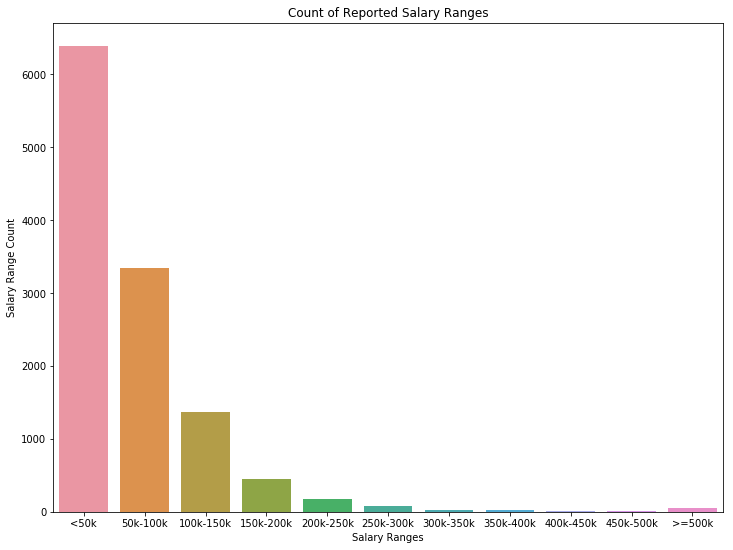

In [39]:
sns.barplot(x='Salary Ranges',y='Salary Range Count',data=df_salary_range).set_title('Count of Reported Salary Ranges')

From the plot is clear that there is signficantly more salaries reported in the less than 50,000 range then any other category. In fact 53.56% of the reported salaries fall within this range. Thus it is reasonable to assume that there is a bias in the dataset toward a salary less than $50,000. This may reflected in the model development.

We can further see this by plotting a distplot of the salaries as function of the number of occurances. This should mimick the salary range barplot above.

C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distplot of Reported Salary')

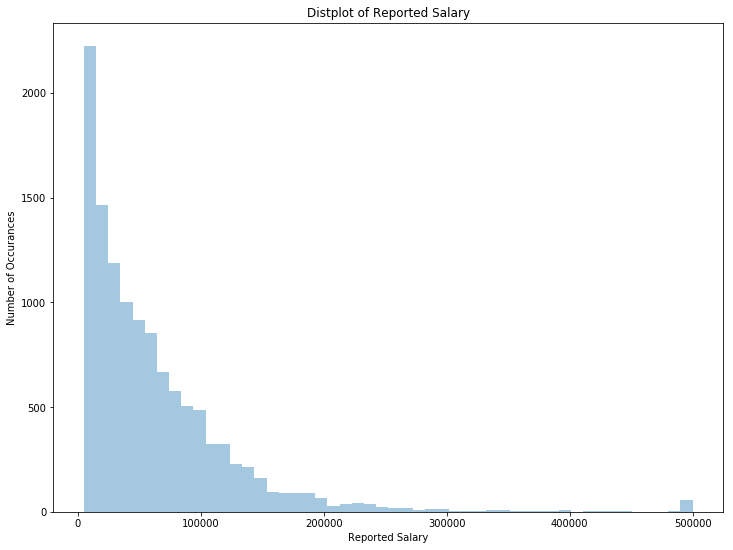

In [40]:
sns.distplot(df_kaggle_clean_cat['Q9_Copy'], kde=False);
plt.xlabel("Reported Salary")
plt.ylabel("Number of Occurances")
plt.title("Distplot of Reported Salary") # You can comment this line out if you don't need title

The next visualization that we can use to help understand the dataset is a salary as a function of programming language used as in Q17 of the survey. It is ambiguous in the general data science community of whether or not learing or knowin a specific language can be more beneficial in terms of earning potential across an data scientists career. This graph will give a better understanding of whether or not this is the true or not.

Text(0.5, 1.0, 'Salary as a Function of Programming Language')

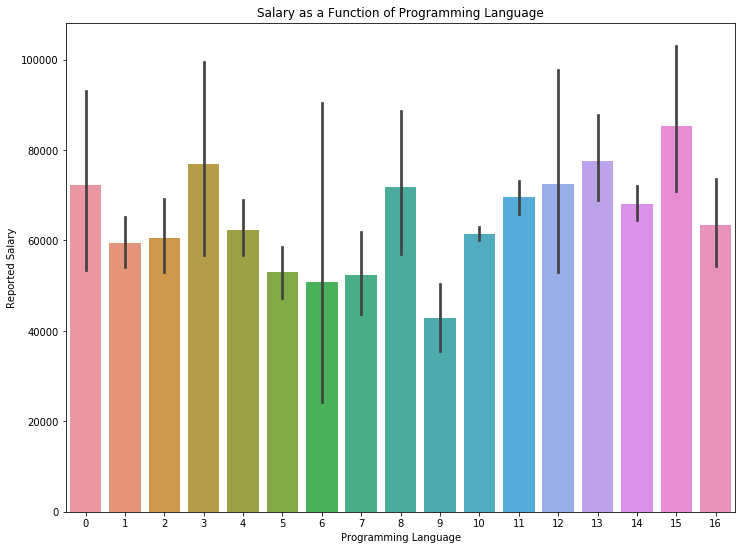

In [41]:
fig = sns.barplot(x = 'Q17', y = 'Q9_Copy', data = df_kaggle_clean_cat)
plt.xlabel("Programming Language")
plt.ylabel("Reported Salary")
plt.title("Salary as a Function of Programming Language") # You can comment this line out if you don't need title

As can be seen above there is not significant difference in the reproted salary as a function of the programming language. That is to say it does not appear that knowing a specifc programming language would result in a greater salary. Further since all programming languages appear to be represented almost equally (with the exception of programming language 9 and 5) it is unlikely that there is a strong correlation between this input feature and the target feature (reported salary).

The next plot that we will be examining to better understand the data, is salary as a function of sex. This will be accomplished through the use of a barplot.

Text(0.5, 1.0, 'Salary as a Function of Sex')

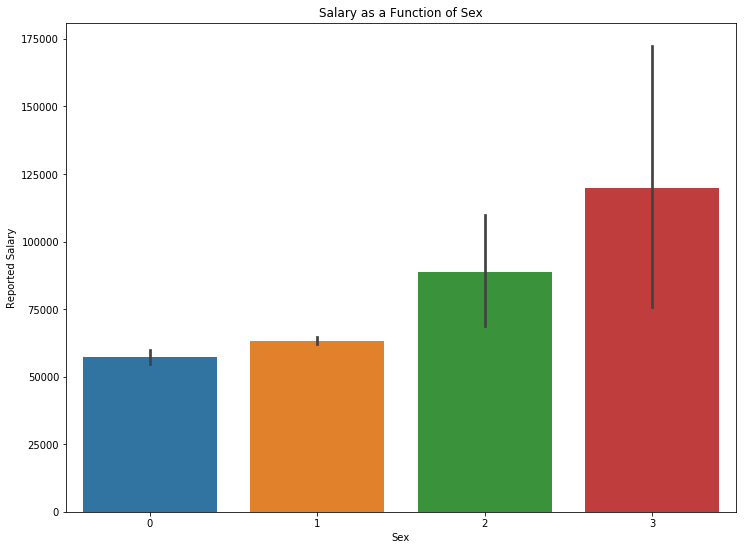

In [42]:
sns.barplot(x = 'Q1', y = 'Q9_Copy', data = df_kaggle_clean_cat)
plt.xlabel("Sex")
plt.ylabel("Reported Salary")
plt.title("Salary as a Function of Sex") # You can comment this line out if you don't need title

From the visual representation above it is clear that there is a slightly higher reported salary for males (1) than females (0) based on the reproted salaries in the survey. This is interesting, but also important to note that te difference is not substantial and as such will likely only have a small imapct on the model development and feature determined dependicies. 

Sex entries 2 and 3 are values for indiviudals who have reported prefer not to describe or other. These represent 130 (prefer not to say) and 53 (Prefer to self-describe) entries. Thus on a dataset containing 11,921 entries these two represent only 1.09% (prefer not to say) and 0.44% (prefer to self-desribe). All of this is to say that the salaries shown above for these two cateogry entries is likely distorted and not representative of the overall data. These are effectively outlier values that could be dropped from the dataset, but will be kept in for this analysis.

The final visualization that will be shown in this assignment is a joint plot showing the reported salary (in Q9_Copy) plotted against the Country of Residence (in Q3).

Text(0.5, 1.0, 'Joint Plot - Country of Residence and Reported Salary')

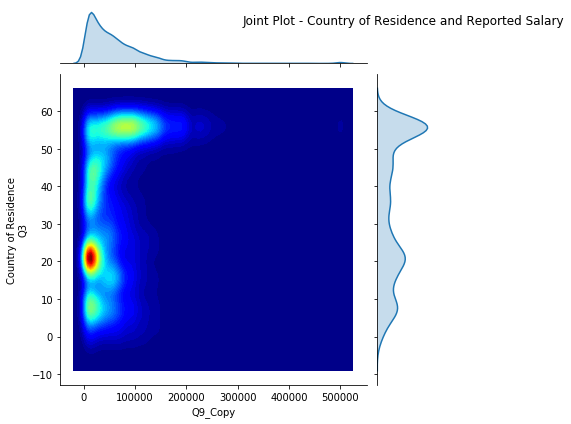

In [43]:
sns.jointplot(x='Q9_Copy', y='Q3', data=df_kaggle_clean_cat, kind='kde', cmap='jet', n_levels=60)
plt.ylabel("Country of Residence", labelpad = 360)
plt.title("Joint Plot - Country of Residence and Reported Salary", pad=50) # You can comment this line out if you don't need title

As can be seen there is a high concentration of reproted salaries in the 50,000-75,000 range for Country of Residences from 55-60. Further, the highest concentration of salaries for countries 18-25 fall within the lower range of the salaries reported as can be seen by the dark red. These concentrated values suggest that there is a high correlation betwee the Country of Residence and the Reported Salary. It is expected that by running the .corr function a high correlation number would be recieved for this input feature. In fact lets run this below.

In [44]:
df_kaggle_clean_cat['Q9_Copy'].corr(df_kaggle_clean_cat['Q3'])

0.26482293840838333

As can be seen the correlation number is quite high at 0.265. As we will see below this is actually one of the larger correlated input features in the dataset.

To check the correlation for all inputs and targets to each other, lets create a dataframe called "df_correlation_matrix".

In [45]:
df_correlation_matrix = pd.DataFrame(df_kaggle_clean_cat.corr(), columns=["Input Feature","Q9 Correlation"])

In [46]:
df_correlation_matrix = df_kaggle_clean_cat.corr()
df_correlation_matrix = df_correlation_matrix.drop(['Q9_Copy'])
df_correlation_matrix = df_correlation_matrix.drop(['Q9'])
df_correlation_matrix = df_correlation_matrix.drop(['Unnamed: 0'])
df_correlation_matrix = df_correlation_matrix.drop(['Unnamed: 0'], axis = 1)
df_correlation_matrix = df_correlation_matrix.drop(['Q9_Copy'], axis = 1)

In [47]:
df_correlation_matrix.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
Time from Start to Finish (seconds),1.000000,-0.008980,-0.008262,-0.020980,0.000404,0.006612,0.002641,0.009249,-0.023153,-0.017425,...,-0.000065,0.008074,-0.006997,-0.021896,-0.002858,-0.011178,-0.029807,-0.011152,-0.005564,-0.024829
Q1,-0.008980,1.000000,0.079760,-0.072460,-0.008116,-0.051276,0.017042,0.007061,0.071665,0.057728,...,-0.003339,-0.001314,0.036039,0.028156,0.004190,0.015811,0.027667,-0.011998,-0.010334,-0.025822
Q2,-0.008262,0.079760,1.000000,0.073562,0.057779,0.062773,-0.092999,-0.012625,0.270826,0.348161,...,0.035395,0.042525,0.000136,0.001358,-0.016560,-0.004578,0.005215,-0.008270,0.074967,0.025828
Q3,-0.020980,-0.072460,0.073562,1.000000,0.006992,0.106235,-0.034252,0.060457,-0.016215,0.264823,...,-0.004145,0.027209,-0.017489,0.043223,-0.016324,-0.005598,0.031605,0.002191,0.036808,0.041251
Q4,0.000404,-0.008116,0.057779,0.006992,1.000000,-0.013462,-0.057425,0.040867,0.023074,0.008350,...,-0.003443,-0.004444,0.002548,-0.011666,0.001146,0.009331,-0.011444,0.003084,0.018680,-0.001768


Next lets extract just the correlation between the input features and the target variable in column Q9. Lets store this in a dataframe "df_correlation_matrix_Q9".

In [48]:
df_correlation_matrix_Q9 = pd.DataFrame(df_correlation_matrix["Q9"], columns=["Q9 Correlation"])

In [49]:
df_correlation_matrix_Q9["Q9 Correlation"] = df_correlation_matrix["Q9"]
df_correlation_matrix_Q9.head()

,Q9 Correlation
Time from Start to Finish (seconds),-0.017425
Q1,0.057728
Q2,0.348161
Q3,0.264823
Q4,0.008350


Next lets drop all non-relevant rows so we have just the input features of interest and their associated Q9 Correlation. Lets also perform some organization by renaming columns and resetting the index.

In [50]:
df_correlation_matrix_Q9["Input Feature"] = df_correlation_matrix.index
df_correlation_matrix_Q9 = df_correlation_matrix_Q9.reset_index()
df_correlation_matrix_Q9 = df_correlation_matrix_Q9.drop(['index'], axis = 1)
df_correlation_matrix_Q9.insert(0, 'Input Feature Number', range(0, len(df_correlation_matrix_Q9)))
df_correlation_matrix_Q9.head()

,Input Feature Number,Q9 Correlation,Input Feature
0,0,-0.017425,Time from Start to Finish (seconds)
1,1,0.057728,Q1
2,2,0.348161,Q2
3,3,0.264823,Q3
4,4,0.008350,Q4


There, the above dataframe shows the correlation values for each input feature evaluated against the target variable Q9.

Lets look at the maximum correlation value.

In [51]:
print (max(df_correlation_matrix_Q9['Q9 Correlation']))

0.34816106461310337


How about the minimum correlation value.

In [52]:
print (min(df_correlation_matrix_Q9['Q9 Correlation']))

-0.13350348434008416


Finally lets visualize the correlation values for each input feature against the target variable in a scatter plot.

Text(0.5, 1.0, 'Input Feautre Correlation with Q9 or Reported Salaries')

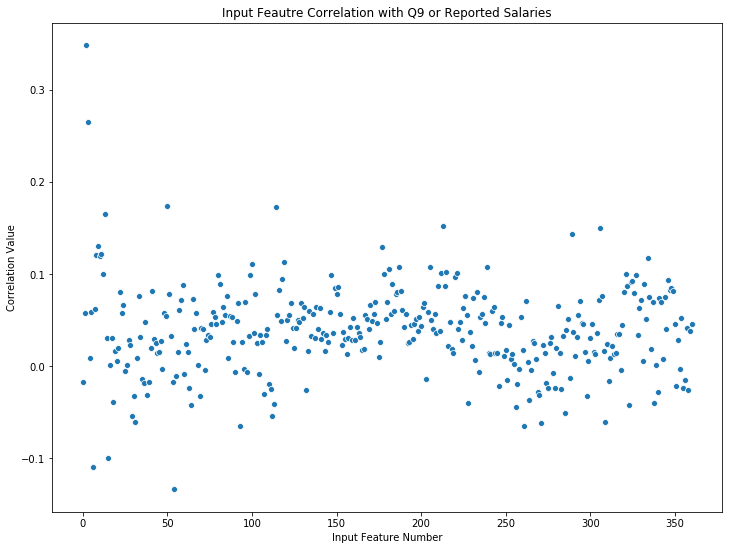

In [53]:
sns.scatterplot(x='Input Feature Number', y='Q9 Correlation', data=df_correlation_matrix_Q9)
plt.xlabel("Input Feature Number")
plt.ylabel("Correlation Value")
plt.title("Input Feautre Correlation with Q9 or Reported Salaries") # You can comment this line out if you don't need title

From the scatterplot above it is apparent that most input features have a correaltion value with the target variable of around 0.0 - 0.1. With the highest being the 0.34 identified above.

One more interesting item we can look at is the top 5 correlation features. This can be called using the nlargest() command.

In [54]:
print (df_correlation_matrix_Q9.nlargest(10, 'Q9 Correlation'))

     Input Feature Number  Q9 Correlation Input Feature
2                       2        0.348161            Q2
3                       3        0.264823            Q3
50                     50        0.173385    Q15_Part_2
114                   114        0.173093    Q27_Part_1
13                     13        0.165580    Q11_Part_4
213                   213        0.152464    Q30_Part_9
306                   306        0.150262    Q42_Part_1
289                   289        0.143145   Q38_Part_10
9                       9        0.130786           Q10
177                   177        0.129248    Q29_Part_1


As we can see above the second highest correlated feature is actually Q3 or the question realting to the Country of Residence. Thus the jointplot shown above and the previous analysis was valid, in that Q3 is highly correlated to Q9.

The remaining other 9 most correlated features can be seen in the list above.

One last interesing item would be to show he correaltion plot for all variables plotted against one another. While not specifc to the Q9 it is interesting to see which features are most correlated to one another. Vaguely looking at Q9 you can see which varaibles are most correlated in this graphic as well. The scatterplot identified above is of more use than the correlation plot show below.

Text(0.5, 1.05, 'Correlation Plot for All Variables')

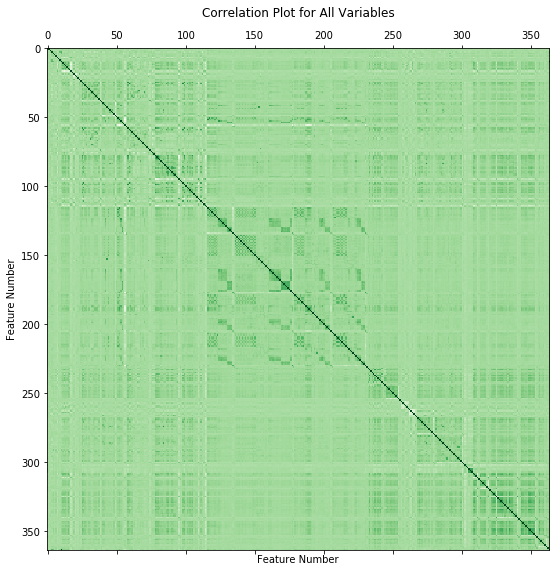

In [55]:
plt.matshow(df_kaggle_clean_cat.corr(),cmap = plt.cm.Greens)
plt.xlabel("Feature Number")
plt.ylabel("Feature Number")
plt.title("Correlation Plot for All Variables") # You can comment this line out if you don't need title

### 3.0 - Feature Selection

The next step is to conduct feature selection. In machine learning feature selection is a process of selecting a set of features from an original dataset that typcially have higher correlation or impact on the desired target variable. There are four main reasons why feature selection is typcially done. These include:
    1. Reduce Training Times
    2. Enable higher generalization of the model by reducing varaince or in other words recucing the odds of overfitting the dataset
    3. Have shorter run times for training by reducing the number of input features that are required to be processed
    4. Also it helps t reduce the notion of the curse of dimensionality. The curse of dimensionality involves the idea that in models with high dimensionality or a large number of input features, there are more things that can go wrong and thus greater odds of model failure.
    
Typcially there are 3 general classes of Feature Selection Algorithms:
    1. Filter Methods
    2. Wrapper Methods
    3. Embedded Methods

For the purposes of this assignmet, we will be using two of these methods, A Wrapper Method known as Recursive Feature Elimination (RFE), and a Filter Method known as Correlation Coefficient Scores.

Lets start with the Wrapper Method, Recursive Feature Elimination. Sklearn has a useful function that can be used to perform RFE. We will do this below.

Lets start with dropping columns Q9_Copy, Q_9, Unnamed: 0 in training set and make a new dataframe "X_df" that will hold the input features.

For use later lets put this also put the test set into a dataframe and call it "y_df".

In [56]:
X_df = pd.DataFrame(df_kaggle_clean_cat)
X_df.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q9_Copy
1,2,434,1,3,22,0,2,11,9,10,...,0,0,0,0,0,0,0,0,0,18668
4,7,959,1,4,8,1,7,11,0,2,...,0,1,0,0,0,0,1,0,0,11957
6,10,751,1,3,19,3,2,17,15,7,...,0,0,1,0,1,0,0,0,0,21152
7,12,823,1,5,56,3,2,7,16,10,...,0,0,1,0,0,1,0,0,0,132826
9,14,1917,1,2,56,0,8,14,0,1,...,0,0,1,0,0,0,0,0,0,35826


In [57]:
X_df = X_df.drop(['Q9_Copy'],axis = 1)
X_df = X_df.drop(['Q9'],axis = 1)
X_df = X_df.drop(['Unnamed: 0'],axis = 1)
X_df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10,...,Q49_Part_11,Q49_Part_12,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8
1,434,1,3,22,0,2,11,9,10,1,...,0,0,0,0,0,0,0,0,0,0
4,959,1,4,8,1,7,11,0,2,1,...,0,0,1,0,0,0,0,1,0,0
6,751,1,3,19,3,2,17,15,7,3,...,0,0,0,1,0,1,0,0,0,0
7,823,1,5,56,3,2,7,16,10,4,...,0,0,0,1,0,0,1,0,0,0
9,1917,1,2,56,0,8,14,0,1,2,...,0,0,0,1,0,0,0,0,0,0


In [58]:
y_df = pd.DataFrame(df_kaggle_clean_cat['Q9'])
y_df.head()
y_targets = y_df.values

To run the RFE algorithm we will need to run Next Lets setup the Train/Test Split. We will be using 0.3 test size and 0.7 Test size for this.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3)

Lets set the model that we will run the RFE alogirthm on as a simple linear regression. After that lets fit the model.

In [60]:
model_lr = linear_model.LinearRegression()
rfe = RFE(model_lr)
fit = rfe.fit(X_train, y_train)

C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


With the model fit, lets view the ranking of each of the input features.

In [61]:
print((list(zip(fit.ranking_,X_train))))

[(182, 'Time from Start to Finish (seconds)'), (51, 'Q1'), (1, 'Q2'), (92, 'Q3'), (117, 'Q4'), (174, 'Q5'), (139, 'Q6'), (151, 'Q7'), (100, 'Q8'), (14, 'Q10'), (1, 'Q11_Part_1'), (1, 'Q11_Part_2'), (1, 'Q11_Part_3'), (1, 'Q11_Part_4'), (1, 'Q11_Part_5'), (114, 'Q11_Part_6'), (1, 'Q11_Part_7'), (135, 'Q12_MULTIPLE_CHOICE'), (180, 'Q12_Part_1_TEXT'), (173, 'Q12_Part_2_TEXT'), (176, 'Q12_Part_3_TEXT'), (179, 'Q12_Part_4_TEXT'), (171, 'Q12_Part_5_TEXT'), (1, 'Q13_Part_1'), (162, 'Q13_Part_2'), (136, 'Q13_Part_3'), (61, 'Q13_Part_4'), (44, 'Q13_Part_5'), (84, 'Q13_Part_6'), (1, 'Q13_Part_7'), (23, 'Q13_Part_8'), (1, 'Q13_Part_9'), (1, 'Q13_Part_10'), (1, 'Q13_Part_11'), (1, 'Q13_Part_12'), (1, 'Q13_Part_13'), (1, 'Q13_Part_14'), (111, 'Q13_Part_15'), (1, 'Q14_Part_1'), (1, 'Q14_Part_2'), (1, 'Q14_Part_3'), (1, 'Q14_Part_4'), (19, 'Q14_Part_5'), (91, 'Q14_Part_6'), (1, 'Q14_Part_7'), (1, 'Q14_Part_8'), (85, 'Q14_Part_9'), (5, 'Q14_Part_10'), (152, 'Q14_Part_11'), (1, 'Q15_Part_1'), (1, 'Q15_

With this information lets add it to the previously created correlation matrix for Q9 (currently stored in the dataframe "df_correlation_matrix_Q9" to see how it compares and to determine cutoff limits for which features to eliminate.

In [62]:
df_correlation_matrix_Q9['RFE_Score'] = fit.ranking_

In [63]:
df_correlation_matrix_Q9.head()

,Input Feature Number,Q9 Correlation,Input Feature,RFE_Score
0,0,-0.017425,Time from Start to Finish (seconds),182
1,1,0.057728,Q1,51
2,2,0.348161,Q2,1
3,3,0.264823,Q3,92
4,4,0.008350,Q4,117


With the dataframe constructed lets do a quick sanity check to make sure that some of the top features in terms of correlation also have a high rank (low number) in terms of RFE Score.

In [64]:
print (df_correlation_matrix_Q9.nlargest(5, 'Q9 Correlation'))

     Input Feature Number  Q9 Correlation Input Feature  RFE_Score
2                       2        0.348161            Q2          1
3                       3        0.264823            Q3         92
50                     50        0.173385    Q15_Part_2          1
114                   114        0.173093    Q27_Part_1          1
13                     13        0.165580    Q11_Part_4          1


In [65]:
print (df_correlation_matrix_Q9.nsmallest(5, 'RFE_Score'))

    Input Feature Number  Q9 Correlation Input Feature  RFE_Score
2                      2        0.348161            Q2          1
10                    10        0.119970    Q11_Part_1          1
11                    11        0.121141    Q11_Part_2          1
12                    12        0.100221    Q11_Part_3          1
13                    13        0.165580    Q11_Part_4          1


Next lets start with eliminating features that have a rank higher than rank 1 for the RFE score.

In [66]:
df_feature_eliminated = df_correlation_matrix_Q9[df_correlation_matrix_Q9.RFE_Score < 2]
df_feature_eliminated.head()

,Input Feature Number,Q9 Correlation,Input Feature,RFE_Score
2,2,0.348161,Q2,1
10,10,0.119970,Q11_Part_1,1
11,11,0.121141,Q11_Part_2,1
12,12,0.100221,Q11_Part_3,1
13,13,0.165580,Q11_Part_4,1


In [67]:
print (len(df_feature_eliminated))

180


The above shows that there are 180 features with a RFE_Score or rank of 1. That completes the application of RFE for feature selection. Next as discussed earlier we will now apply the Correlation Coefficient Feature Selection algorithm.

To do this lets remove any of the remaining features whose Q9 Correlation is either not greater than 0.065 or less than -0.05.

In [68]:
sorted(df_feature_eliminated['Q9 Correlation'])

[-0.13350348434008416,
 -0.06497969457257968,
 -0.061845605197134064,
 -0.06044926429443687,
 -0.05461493993382639,
 -0.05131978423545464,
 -0.04051231233793415,
 -0.03305226149837841,
 -0.03223228369295493,
 -0.0319928624757209,
 -0.031465212581026636,
 -0.0283859147668509,
 -0.025994630336585476,
 -0.024468446262112583,
 -0.018552926191048157,
 -0.01854401022489292,
 -0.01758500454015166,
 -0.017422294802640934,
 -0.014772799992006504,
 -0.01423599521519102,
 -0.01279924177162386,
 -0.008386829639227891,
 -0.007787439176757095,
 -0.0064818623259187864,
 -0.003974368207479398,
 0.0006092757497301923,
 0.0013419574261217156,
 0.004975576926621843,
 0.005070995162670478,
 0.00730601026495215,
 0.008384842855461592,
 0.008852705972092563,
 0.010313309753067686,
 0.010448642765780112,
 0.013051611117396084,
 0.013469631024639337,
 0.013476830003828317,
 0.013680109098377165,
 0.01424672815948834,
 0.014761124962112534,
 0.014840644551299003,
 0.01522560202647423,
 0.01597476631397858,
 0.

The code below will eliminate any features with a correlation score to Q9 that is less than 0.05.

In [69]:
df_feature_eliminated_1 = df_feature_eliminated[df_feature_eliminated['Q9 Correlation'] > 0.05]

In [70]:
print(len(df_feature_eliminated_1))

72


With that done we can see that there are 43 features with a correlation score higher than the cutoff of 0.05.

Next lets also inlcude the features with a correlation score lower than the cutoff of -0.05. This is because a highly negative score means that there is strong inverse correlation between the input feature and target varaible that we still want to capture this data.

In [71]:
df_feature_eliminated_2 = df_feature_eliminated[df_feature_eliminated['Q9 Correlation'] < (-0.05)]

In [72]:
print(len(df_feature_eliminated_2))

6


From the code snippet above it is clear that there are 4 features that have a Q9 correlation of less than -0.05.

Next lets take the two newly generarated dataframes storing the input features which have a either a higher than 0.05 correlation with target variable Q9 and a correlation score lower than -0.05. This will be stored in a new dataframe called "frames".

In [73]:
frames = [df_feature_eliminated_1, df_feature_eliminated_2]

In [74]:
result = pd.concat(frames)

With this done lets see how many relevant features we ended up with based on the filtration criteria above.

In [75]:
print(len(result))

78


It looks like we landed on 72 relevant features. Now lets take a look at what those features are. For ease of extraction from the original dataframe lets store these question names in a list called "relevant_features".

In [76]:
relavant_features = result['Input Feature'].values

In [77]:
print (relavant_features)

['Q2' 'Q11_Part_1' 'Q11_Part_2' 'Q11_Part_3' 'Q11_Part_4' 'Q13_Part_1'
 'Q13_Part_11' 'Q14_Part_4' 'Q15_Part_1' 'Q15_Part_2' 'Q15_Part_3'
 'Q16_Part_12' 'Q19_Part_6' 'Q19_Part_17' 'Q21_Part_4' 'Q21_Part_5'
 'Q27_Part_1' 'Q27_Part_5' 'Q27_Part_6' 'Q27_Part_10' 'Q27_Part_17'
 'Q27_Part_18' 'Q28_Part_3' 'Q28_Part_5' 'Q28_Part_7' 'Q28_Part_13'
 'Q28_Part_16' 'Q28_Part_17' 'Q28_Part_18' 'Q28_Part_35' 'Q28_Part_37'
 'Q28_Part_39' 'Q28_Part_40' 'Q29_Part_1' 'Q29_Part_2' 'Q29_Part_4'
 'Q29_Part_5' 'Q29_Part_6' 'Q29_Part_7' 'Q29_Part_8' 'Q29_Part_9'
 'Q29_Part_10' 'Q29_Part_11' 'Q29_Part_21' 'Q29_Part_23' 'Q29_Part_25'
 'Q29_Part_26' 'Q30_Part_6' 'Q30_Part_8' 'Q30_Part_9' 'Q30_Part_11'
 'Q30_Part_16' 'Q30_Part_21' 'Q30_Part_22' 'Q30_Part_23' 'Q31_Part_4'
 'Q31_Part_6' 'Q31_Part_7' 'Q31_Part_10' 'Q38_Part_2' 'Q38_Part_8'
 'Q38_Part_10' 'Q38_Part_14' 'Q38_Part_15' 'Q42_Part_1' 'Q45_Part_3'
 'Q45_Part_5' 'Q47_Part_2' 'Q47_Part_10' 'Q47_Part_13' 'Q49_Part_2'
 'Q49_Part_6' 'Q13_Part_7' 'Q13_Part_9' 

From above, we can see the question titles of the 72 relevant features based on the feature selection proceudre identified above.

Next lets apply these relevant features to the original cleaned dataframe "df_kaggle_clean_cat" to get a new dataframe containing only the relevant features and the corresponding cleaned inputs values.

In [78]:
df_kaggle_feature_eliminated = df_kaggle_clean_cat[relavant_features]

In [79]:
df_kaggle_feature_eliminated.head()

,Q2,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q13_Part_1,Q13_Part_11,Q14_Part_4,Q15_Part_1,Q15_Part_2,...,Q47_Part_10,Q47_Part_13,Q49_Part_2,Q49_Part_6,Q13_Part_7,Q13_Part_9,Q15_Part_6,Q19_Part_18,Q36_Part_6,Q38_Part_6
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,3,0,1,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,5,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,1,0
9,2,1,0,0,1,1,1,0,1,1,...,1,0,0,1,1,1,0,0,0,0


As a sanity check lets make sure the length of the dataframe is still 11,921 as this is length of answers from the "df_clean_cat" prior to feature elimination.

In [80]:
print (len(df_kaggle_feature_eliminated))

11921


In [81]:
df_kaggle_feature_eliminated.shape

(11921, 78)

In [82]:
y_df.shape

(11921, 1)

Next lets setup the train and test sets.

In [83]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(df_kaggle_feature_eliminated, y_df, test_size = 0.3, random_state = 1)

A quick sanity check should be done on the train and test set to ensure that the indicies of the input data match the indicies of the target data after the train_test_split call.

In [84]:
print(X_train_set.head())
print(y_train_set.head())

       Q2  Q11_Part_1  Q11_Part_2  Q11_Part_3  Q11_Part_4  Q13_Part_1  \
7307    3           0           0           1           0           1   
9094    5           0           0           0           0           0   
12176   0           0           0           0           0           0   
6487    6           0           0           0           0           1   
3400    3           1           1           1           1           0   

       Q13_Part_11  Q14_Part_4  Q15_Part_1  Q15_Part_2     ...      \
7307             0           0           0           0     ...       
9094             0           0           0           0     ...       
12176            0           0           0           0     ...       
6487             0           0           1           1     ...       
3400             0           0           1           1     ...       

       Q47_Part_10  Q47_Part_13  Q49_Part_2  Q49_Part_6  Q13_Part_7  \
7307             0            0           0           1           1  

### 4.0 Model Implementation

The four different regression/prediction algorthms that will be implemented are  are:
    - 'Lasso': linear_model.Lasso(), #KEEP
    - 'Ridge': linear_model.Ridge(alpha=.5),
    - 'rfr': RandomForestRegressor(),
    - 'GBR': GradientBoostingRegressor(learning_rate = 0.1,
                                random_state = 1234)

Next lets setup the models to be examined. See above for the listing of which models will be explored. Note no hyper parameter tuning has been conducted on these models. These are the models implemented with default settings. 

We will also setup a dataframe called resultDF that will hold the model name, hyperparameters, train_acc, train_std, test_acc, test_std.

df_idx will be declared at 0 to hold the index of dataframe.

In [85]:
resultDF = pd.DataFrame(columns=['model','hyperparams','train_acc','train_std','test_acc','test_std'])
df_idx = 0

The models will be held in a set called "models". This will allow us to loop through cross valdiation making it easier to evaluate all models. Note this code has been modified from the example posted by the professor.

In [86]:
models = {
    'Lasso': linear_model.Lasso(), #KEEP
    'Ridge': linear_model.Ridge(alpha=.5),
    'rfr': RandomForestRegressor(),
    'GBR': GradientBoostingRegressor(learning_rate = 0.1,
                                random_state = 1234)
}

Lets now setup the cross validate function that will loop through the various models above with their default values with 10 folds to determine an R2 Score along with standard deviation. The individual fold R2 Scores will also be displayed.

In [87]:
def crossValidate(typ, model, X, y, hyperparams='default', verbose=0):
    global df_idx
    verbose = 2
    # Update model hyperparameters if given
    if hyperparams is not 'default':
        model.set_params(**hyperparams)
    
    # Initialize scaler class
    #scaler = StandardScaler()
    
    # Get kFolds
    kfold = KFold(n_splits=10)
    kfold.get_n_splits(X)

    # Initialize storage vectors
    trainACC = np.zeros(10)
    testACC = np.zeros(10)
    np_idx = 0

    # Loop through folds
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        # Scale data
        #X_train = scaler.fit_transform(X_train)
        #X_test = scaler.transform(X_test)

        # Fit to training set
        model.fit(X_train, y_train.ravel()) #ADD RAVEL HERE IF NECCESSARY

        # Make predictions on testing set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Compute training and testing accuracy
        trainACC[np_idx] = r2_score(y_train, y_train_pred)*100
        testACC[np_idx] = r2_score(y_test, y_test_pred)*100
        # Print fold accuracy if verbose level 2
        if verbose == 2:
            print ("    Fold {}: Accuracy: {}%".format(np_idx+1, round(testACC[np_idx],2)))   
            
        #print ('Fold', np_idx, 'Accuracy ', round(testACC[np_idx],2), '%')
        np_idx += 1



    # Print average accuracy if verbose level 1
    if verbose == 2:
        print ("  Average Score: {}%({}%)".format(round(np.mean(testACC),3),round(np.std(testACC),3)))
    
    # Update dataframe
    resultDF.loc[df_idx, 'model'] = typ
    resultDF.loc[df_idx, 'hyperparams'] = str(hyperparams)
    resultDF.loc[df_idx, 'train_acc'] = trainACC.mean()
    resultDF.loc[df_idx, 'train_std'] = trainACC.std()
    resultDF.loc[df_idx, 'test_acc'] = testACC.mean()
    resultDF.loc[df_idx, 'test_std'] = testACC.std()
    df_idx += 1                                         
                                         
    # Return average testing accuracy, and fitted model
    return testACC.mean(), model

With the function defined, lets now setup the for loop which will cycle through the models identified above sequentially calling the crossValidate function defined above. The outputs of this will be the fold accuracies of the various models along with the mean R2 Score and Standard Deviation.

In [88]:
for name, m in models.items():
    print ("Fitting " + name + " model")
    _, models[name] = crossValidate(name, m, X_train_set, y_train_set, 'default', 1)

Fitting Lasso model
    Fold 1: Accuracy: 21.63%
    Fold 2: Accuracy: 29.52%
    Fold 3: Accuracy: 21.98%
    Fold 4: Accuracy: 21.11%
    Fold 5: Accuracy: 19.88%
    Fold 6: Accuracy: 21.4%
    Fold 7: Accuracy: 25.96%
    Fold 8: Accuracy: 28.62%
    Fold 9: Accuracy: 19.3%
    Fold 10: Accuracy: 24.81%
  Average Score: 23.42%(3.417%)
Fitting Ridge model
    Fold 1: Accuracy: 21.63%
    Fold 2: Accuracy: 29.52%
    Fold 3: Accuracy: 21.98%
    Fold 4: Accuracy: 21.12%
    Fold 5: Accuracy: 19.88%
    Fold 6: Accuracy: 21.4%
    Fold 7: Accuracy: 25.97%
    Fold 8: Accuracy: 28.61%
    Fold 9: Accuracy: 19.31%
    Fold 10: Accuracy: 24.81%
  Average Score: 23.424%(3.417%)
Fitting rfr model


C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


    Fold 1: Accuracy: 6.62%
    Fold 2: Accuracy: 12.43%
    Fold 3: Accuracy: 12.83%
    Fold 4: Accuracy: 5.63%
    Fold 5: Accuracy: 9.47%
    Fold 6: Accuracy: 7.69%
    Fold 7: Accuracy: 12.64%
    Fold 8: Accuracy: 7.21%
    Fold 9: Accuracy: 4.52%
    Fold 10: Accuracy: 14.0%
  Average Score: 9.305%(3.257%)
Fitting GBR model
    Fold 1: Accuracy: 22.07%
    Fold 2: Accuracy: 26.16%
    Fold 3: Accuracy: 29.45%
    Fold 4: Accuracy: 24.93%
    Fold 5: Accuracy: 21.84%
    Fold 6: Accuracy: 21.91%
    Fold 7: Accuracy: 30.71%
    Fold 8: Accuracy: 27.11%
    Fold 9: Accuracy: 18.78%
    Fold 10: Accuracy: 28.66%
  Average Score: 25.161%(3.717%)


As can be seen above the models overall perform rather poorly. The mean accuracies and the standard deviation for each of the models can be seen below at the time of running:
    - Linear Lasso Model:
        - Mean R2 Score = 23.382%
        - Standard Deviation of R2 Score = 3.412%
    - Linear Ridge Model
        - Mean R2 Score = 23.386%
        - Standard Deviation of R2 Score = 3.41%
    - Random Forest Regression Model
        - Mean R2 Score = 9.056%
        - Standard Deviation of R2 Score = 5.463%
    - Gradient Boosting Regression Model
        - Mean R2 Score = 25.233%
        - Standard Deviation of R2 Score = 4.081%

To evaluate models in regression or multiple regressors on a specifc domain performance measures must be used. For the purposes of this assignment the R2 Score or the coefficient of determination will be used. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. 

The Sklearn implementation of R2 has a best possible score of 1.0 or 100% and the result can be negative as the model can be arbitarily worse than a line through the mean of data. A constant model that always predicts the expected value of y, disregarding the input features, would recieve a R2 score of 0.0 or 0.0%.

As can be seen above the model which performs the best with default parameters is the Gradient Boosting Regression Model with a Mean R2 Score of 25.233% and a standard deviation of 4.081%.

Error is defined by the following equation: error = bias + variance. The bias is an error from erroneous assumptions in the learning algorithm. If  predictions are close to the original target, then it is said that we have a low bias. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting). The variance is an error from sensitivity to small fluctuations in the training set. It measures the spread or variations in predictions. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. Lasso regression is an extension of the linear regression which performs both variable selection and regularization. Lasso regression trades off an increase in bias with a decrease in variance. However, Lasso regression goes to an extent where it enforces the β coefficients to become 0. The main difference from Ridge regression is that the regularization term is in absolute value. The Lasso method not only punishes high values of the coefficients β but actually sets them to zero if they are not relevant. Therefore, you can end up with fewer features in in the model than you started with, which can be beneficial for preventing the curse of dimensionality. Lasso Regression was selected as it is a beter method for linear regression and will provide a good baseline for model comparisons.|
    - Pros: 
        - Allows for elimination of irrlevant features by setting beta coefficients to 0
        - Reduces Dimensionalty
        - Helps to reduce overfitting of the model
    - Cons: 
        - The lasso implementation above is a linear model fit to the data can be restrictive in terms of regession accuracy especially in cases where dimensionality after regualrization is still large

Ridge Regression is a technique for analyzing multiple regression data. Ridge regression is an extension of Linear regression. It is a regularization method which tries to avoid overfitting of data by penalizing large coefficients. Ridge regression has an additional factor called λ (lambda) which is called the penalty factor which is added while estimating beta coefficients. This penalty factor penalizes high value of beta which in turn shrinks beta coefficients thereby reducing the mean squared error and predicted error. An important note that should be mentioned about ridge regression is that it forces the β coefficients to be lower, but it does not allow them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model. Ridge Regression was selected as it would be interesting to compare performance with Lasso and also allows for regularization of input features.
    - Pros: 
        - Allows for reduced impact of irrelevant features by reducing beta coefficients
        - Helps to reduce overfitting of the model
    - Cons: 
        - The ridge implementation above is a linear model fit to the data can be restrictive in terms of regession accuracy especially in cases where dimensionality is large

Gradient boosting is an ensemble method based on weak learners (with high bias, low variance). Boosting reduces error by primairly reducing bias and to some extent variance as well through the aggregation of the output from many models. Gradient Boosting builds an additive model in a forward stage-wise manner. It allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function. Gradient Boosting is typcially used in regression modelling, and will provide a good contrast to the lienar techniques identified above thus it makes it a good option for modelling.
    - Pros:
        - Since boosted trees are derived by optimizing an objective function, basically GBM can be used to solve almost all objective function that we can write gradient out. This including things like ranking and poission regression, which RF is harder to achieve.
    - Cons:
        - GBMs are more sensitive to overfitting if the data is noisy.
        - Training generally takes longer because of the fact that trees are built sequentially.
        - GBMs are harder to tune than RF. There are typically three parameters: number of trees, depth of trees and learning rate, and the each tree built is generally shallow.

In contrast Random Forest is also a ensemble method which uses fully grown decision trees which have low bias, and high variance. A random forest is a estimator that fits a number of decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. In essence it attempts to solve error reduction in the opposite manner to Gradient Boosting in that it reduces variance. The trees are made not correlated to one another such to maximize the reduction in variance. But the algorithm can't reduce bias. This algorithm was chosen as it typcially has high accuracy in domains with large number of features and it is a sum of a piecewise function which may allow for better fitting of the data.
    - Pros: 
        - A single decision tree tends to overfit the data. The process of averaging or combining the results of different decision trees helps to overcome the problem of overfitting.
        - Random forests also have less variance than a single decision tree. It means that it works correctly for a large range of data items than single decision trees.
        - They also do not require preparation of the input data. You do not have to scale the data.
    - Cons:
        - The main disadvantage of Random forests is their complexity. They are much harder and time-consuming to construct than decision trees.
        - They also require more computational resources and are also less intuitive. When you have a large collection of decision trees it is hard to have an intuitive grasp of the relationship existing in the input data.
        - In addition, the prediction process using random forests is time-consuming than other algorithms.

Thus it stands to reason that the Gradient Boosting Algorithm has a greater potential for error reduction as it is starting with low variance and optimizing to reduce bias while also reducing variance through the aggregaion of the output of multiple models as where Random Forests can only optimize the reduction of variance.

A true comparison of which model is the best for this application should occur after hyperparameter optimization. This will be explored in the next section 5.0 Model Tuning.

### 5.0 Model Tuning

With the baseline models implemented, lets jump into tuning of the models to see if we can increase the accuracies.

Lets start off with declaring a list to hold the tuned model performances.

In [89]:
tuned_model_performance = 4*[0]

Next lets run gridsearch on the linear lasso model. As mentioned in the assignment, the code block for this has been commented out due to high run times. The optimal parameters as a result of running this have been printed and hardcoded below.

In [236]:
#DO NOT RUN THIS CELL

#reg_gridsearch = linear_model.Lasso()
#Parameters to test
#parameters = {'alpha':[0.5,1,3,5,6,7,10], # Constant that multiplies the L1 term. Defaults to 1.0.
#             'normalize':[True,False]} #

# Compare parameters by score of model 
#acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
#grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, scoring=acc_scorer_lm, cv = 5)
#grid_obj_lm = grid_obj_lm.fit(X_train_set, y_train_set)

#reg_gridsearch = grid_obj_lm.best_estimator_  #Select best parameter combination

In [237]:
#DO NOT RUN THIS CELL

#reg_gridsearch # print out the optimal params so grid search does not need to be rerun

Lasso(alpha=7, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

The optimal parameters from the result of running gridsearch cv on the linear lasso model is printed above (only present if you run the gridsearch uncommented). These are hardcoded into the linear optimal model (reg_gridsearch_optimal) model below.

In [90]:
reg_gridsearch_optimal = linear_model.Lasso(alpha=7, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

With the optimal parameters harcoded lets examine the model accuracy on the entriety of the training set.

In [91]:
reg_gridsearch_optimal.fit(X_train_set, y_train_set)
tuned_model_performance[0] = reg_gridsearch_optimal.score(X_train_set, y_train_set)
print (tuned_model_performance[0])

0.25028165722151674


As can be seen the optimal Linear Lasso Model's R2 Score on the training set is 25.03%. Comparing this to the untuned model's R2 Score of 23.382% we can see a marginal increase in model accuracy. Below we will print parameters that allowed for optimization of the Linear Lasso Model.

In [92]:
print('alpha (Constant that multiplies the L1 term):',reg_gridsearch_optimal.alpha) 
print('normalize:',reg_gridsearch_optimal.normalize)

alpha (Constant that multiplies the L1 term): 7
normalize: True


Next lets run hyperparameter turing for the Random Forest model. Similar to the above this is commented out due to run times. The optimal parameters will be hard coded below.

In [241]:
# DO NOT RUN THIS CELL

#reg_gridsearch_rfr = RandomForestRegressor()

#Parameters to test
#parameters_rfr = {'bootstrap': [True],
#    'max_depth': [80, 90, 100, 110],
#    'max_features': [2, 3],
#    'min_samples_leaf': [3, 4, 5],
#    'min_samples_split': [8, 10, 12],
#    'n_estimators': [100, 200, 300, 1000]}


# Compare parameters by score of model 
#acc_scorer_rfr = make_scorer(r2_score)

# Run the grid search
#grid_obj_rfr = GridSearchCV(estimator = reg_gridsearch_rfr, param_grid = parameters_rfr, cv = 5, n_jobs = -1, verbose = 2, scoring=acc_scorer_rfr)
#grid_obj_rfr = grid_obj_rfr.fit(X_train_set, y_train_set.values.ravel())

#reg_gridsearch_rfr = grid_obj_rfr.best_estimator_  #Select best parameter combination

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.8min finished


In [242]:
# DO NOT RUN THIS CELL

#reg_gridsearch_rfr # print out the optimal params so grid search does not need to be rerun

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

The optimal parameters from runing gridsearch CV on the random forest regression model is stored in the model "reg_gridsearch_optimal_rfr" below.

In [93]:
reg_gridsearch_optimal_rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

As can be seen the optimal Random Forest Regression Model's R2 Score on the training set is 28.51%. Comparing this to the untuned model's R2 Score of 9.056% we can see a significant increase in model accuracy. Below we will print parameters that allowed for optimization of the Linear Lasso Model.

In [94]:
reg_gridsearch_optimal_rfr.fit(X_train_set, y_train_set.values.ravel())
tuned_model_performance[1] = reg_gridsearch_optimal_rfr.score(X_train_set, y_train_set)
print (tuned_model_performance[1])

0.28513813244954433


In [95]:
print('bootstrap:',reg_gridsearch_optimal_rfr.bootstrap) 
print('max_depth:',reg_gridsearch_optimal_rfr.max_depth)
print('max_features:',reg_gridsearch_optimal_rfr.max_features)
print('min_samples_leaf:',reg_gridsearch_optimal_rfr.min_samples_leaf)
print('min_samples_split:',reg_gridsearch_optimal_rfr.min_samples_split)
print('n_estimators:',reg_gridsearch_optimal_rfr.n_estimators)

bootstrap: True
max_depth: 90
max_features: 3
min_samples_leaf: 3
min_samples_split: 8
n_estimators: 100


Next lets run hyperparameter turing for the Linear Ridge Regression model. Similar to the above this is commented out due to run times. The optimal parameters will be hard coded below.

In [246]:
# DO NOT RUN THIS CELL

#reg_gridsearch_lm_ridge = linear_model.Ridge()
#Parameters to test
#parameters_lm_ridge = {'alpha':[0.1,1.0,10.0], # Constant that multiplies the L1 term. Defaults to 1.0.
#             'normalize':[True,False]} #

# Compare parameters by score of model 
#acc_scorer_lm_ridge = make_scorer(r2_score)

# Run the grid search
#grid_obj_lm_ridge = GridSearchCV(reg_gridsearch_lm_ridge, parameters_lm_ridge, scoring=acc_scorer_lm_ridge, cv = 5)
#grid_obj_lm_ridge = grid_obj_lm_ridge.fit(X_train_set, y_train_set)

#reg_gridsearch_lm_ridge = grid_obj_lm_ridge.best_estimator_  #Select best parameter combination

In [247]:
# DO NOT RUN THIS CELL

#reg_gridsearch_lm_ridge # print out the optimal params so grid search does not need to be rerun

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

The optimal parameters from runing gridsearch CV on the random forest regression model is stored in the model "reg_gridsearch_optimal_lm_ridge" below.

In [96]:
reg_gridsearch_optimal_lm_ridge= linear_model.Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

As can be seen the optimal Linear Ridge Regression Model's R2 Score on the training set is 25.56%. Comparing this to the untuned model's R2 Score of 23.386% we can see a marginal increase in model accuracy.

In [97]:
reg_gridsearch_optimal_lm_ridge.fit(X_train_set, y_train_set.values.ravel())
tuned_model_performance[2] = reg_gridsearch_optimal_lm_ridge.score(X_train_set, y_train_set)
print (tuned_model_performance[2])

0.25563160140372543


Next lets run hyperparameter turing for the Gradient Boosting Regression model. Similar to the above this is commented out due to run times. The optimal parameters will be hard coded below.

In [250]:
# DO NOT RUN THIS CELL

#reg_gridsearch_GBR = GradientBoostingRegressor(learning_rate = 0.1,
#                                random_state = 1234)
#Parameters to test
#parameters_GBR = {'n_estimators':[100],
#                  'learning_rate': [0.1,0.05,0.02],
#                  'max_depth':[4,6],
#                  'min_samples_leaf':[3,5,17],
#                  'max_features':[1.0,0.3,0.1]
#                             }

# Compare parameters by score of model 
#acc_scorer_GBR = make_scorer(r2_score)

# Run the grid search
#grid_obj_GBR = GridSearchCV(estimator = reg_gridsearch_GBR, param_grid = parameters_GBR, cv = 5, n_jobs = -1, verbose = 2, scoring=acc_scorer_GBR)
#grid_obj_GBR = grid_obj_GBR.fit(X_train_set, y_train_set.values.ravel())

#reg_gridsearch_GBR = grid_obj_GBR.best_estimator_  #Select best parameter combination

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.6min finished


In [251]:
# DO NOT RUN THIS CELL

#reg_gridsearch_GBR # print out the optimal params so grid search does not need to be rerun

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

The optimal parameters from runing gridsearch CV on the random forest regression model is stored in the model "reg_gridsearch_optimal_GBR" below.

In [98]:
reg_gridsearch_optimal_GBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=6, max_features=0.3,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

As can be seen the optimal Gradient Boosting Regression Model's R2 Score on the training set is 43.23%. Comparing this to the untuned model's R2 Score of 25.233% we can see a signifcicant increase in model accuracy.

In [99]:
reg_gridsearch_optimal_GBR.fit(X_train_set, y_train_set.values.ravel())
tuned_model_performance[3] = reg_gridsearch_optimal_GBR.score(X_train_set, y_train_set)
print (tuned_model_performance[3])

0.4322991228192763


With the optimal parameter training accuracies calculated in the cells above, lets store them in a dataframe called "df_tuned_model_performance" for easier viewing the resultant R2 training scores.

In [100]:
df_tuned_model_performance= pd.DataFrame(tuned_model_performance, columns=['R2 Score %'])

In [101]:
df_tuned_model_performance["R2 Score %"] = df_tuned_model_performance["R2 Score %"]*100

In [102]:
df_tuned_model_performance["Model"] = ("Linear Lasso","Random Forest Regressor","Linear Ridge","Gradient Boosting Regressor")

In [103]:
df_tuned_model_performance.head()

,R2 Score %,Model
0,25.028166,Linear Lasso
1,28.513813,Random Forest Regressor
2,25.563160,Linear Ridge
3,43.229912,Gradient Boosting Regressor


Lets sort the dataframe above by R2 Score to see which of the models perfromed best after hyperparameter tuning.

In [104]:
print (df_tuned_model_performance.nlargest(4, 'R2 Score %'))

   R2 Score %                        Model
3   43.229912  Gradient Boosting Regressor
1   28.513813      Random Forest Regressor
2   25.563160                 Linear Ridge
0   25.028166                 Linear Lasso


As can be seen above the model with the highest R2 Score of 41.84% is the Gradient Boosting Regressor.

The next best model performance on the training set was Random Forest Regressor with a R2 Score of 26.56% on the training data. The remaining two models performed similarily to the Random Forest Regressor with R2 Accuracy scores of 25.18% for the Linear Ridge Model and 24.78% for the Linear Lasso model.

### 6.0 Testing and Discussion

With the tuned models now completed and the highest training accuracy obtained by the Gradient Boosting Algorithm, lets see how the algorithm performs on the test set. Recall from the train_test_split, the test set is held in the following dataframes X_test_set, and y_test_set. The optimal model is held in predictions_GBR_Optimal.

In [107]:
predictions_GBR_optimal = reg_gridsearch_optimal_GBR.predict(X_test_set)
score_test_set = r2_score(y_test_set,predictions_GBR_optimal)

In [108]:
print (score_test_set*100)

20.40648950515861


As can be seen above the Gradient Boosting Model's optimal parameters as per the gridsearch above produces a R2 Score of around 22.82% when evaluated on the Test Data set. This difference of 22.82% between performance on the test data set and the training dataset likely suggests that the model may be overfitting on the training dataset.

Lets compute the mean percent difference between the predicted values and the actual values in the test set. To do this lets first make a dataframe that holds both the predictions, the acutal results and the percent difference.

In [118]:
df_predictions_optimal_model = pd.DataFrame(predictions_GBR_optimal, columns=['Salary Predictions Test Set'])

In [119]:
df_predictions_optimal_model['Salary Acutal Test Set'] = y_test_set.values

In [120]:
df_predictions_optimal_model['Percent Difference Test Set'] = (df_predictions_optimal_model['Salary Acutal Test Set']-df_predictions_optimal_model['Salary Predictions Test Set'])/(0.5*(df_predictions_optimal_model['Salary Acutal Test Set']+df_predictions_optimal_model['Salary Predictions Test Set']))*100

In [121]:
df_predictions_optimal_model.head()

,Salary Predictions Test Set,Salary Acutal Test Set,Percent Difference Test Set
0,87753.755507,500000,140.278557
1,47283.102405,25479,-59.932579
2,97555.802861,139678,35.511126
3,92085.532722,117304,24.087610
4,69680.843255,116312,50.142958


Now lets call the .describe() function from the pandas dataframe to see the mean, std, as well as the min and max percent differences.

In [122]:
df_predictions_optimal_model['Percent Difference Test Set'].describe()

count    3577.000000
mean      -28.410966
std        70.164552
min      -191.956047
25%       -85.696739
50%       -24.191721
75%        24.930669
max       179.797719
Name: Percent Difference Test Set, dtype: float64

Lets do the same for the training data.

In [123]:
predictions_GBR_optimal_train = reg_gridsearch_optimal_GBR.predict(X_train_set)

In [129]:
df_predictions_optimal_model_train = pd.DataFrame(predictions_GBR_optimal_train, columns=['Salary Predictions Train Set'])
df_predictions_optimal_model_train['Salary Acutal Train Set'] = y_train_set.values
df_predictions_optimal_model_train['Percent Difference Train Set'] = (df_predictions_optimal_model_train['Salary Acutal Train Set']-df_predictions_optimal_model_train['Salary Predictions Train Set'])/(0.5*(df_predictions_optimal_model_train['Salary Acutal Train Set']+df_predictions_optimal_model_train['Salary Predictions Train Set']))*100

In [130]:
df_predictions_optimal_model_train.head()

,Salary Predictions Train Set,Salary Acutal Train Set,Percent Difference Train Set
0,37501.544664,75035,66.704474
1,58041.541742,6274,-160.979882
2,25963.607019,111149,124.256106
3,67218.867500,55958,-18.284062
4,140975.818657,192589,30.946418


In [131]:
df_predictions_optimal_model_train['Percent Difference Train Set'].describe()

count    8344.000000
mean      -28.170253
std        67.213100
min      -178.596008
25%       -81.981821
50%       -23.080558
75%        22.903728
max       174.732939
Name: Percent Difference Train Set, dtype: float64

Interestingly the mean percent difference between the predictions and the actual values for both the training set and the test set are very similar. The mean percent difference in the Training Data is -28.17% with a standard deviation of 67% while the mean percent difference using the Test Data is -28.41% with a standard deviation of 70%. This suggests that the model is performing simialrily when comparing the predictions for the training data against the actual training data targerts and the predictions for the test data against the actual test data targets.   

To increase model accuarcy for both the training and test data the following could be done:
    - Change the encoding used for categorical labelling to one hot encoding or other similar methods. This assigment used primairly label encoding which may result in a loss of iformation for questions with large number of categorical features.
    - Change the number of input features selected to train on. This assignment used 79, perhaps more or less features would result in better training accuracy which may or may not result in subsquent better fitting and thus better performance on the test set.
    - Change the hyperparameter options used. There is a tradeoff in performance for which hyperparameters are tuned and to wihtin what ranges. It is not possible to test all combinations I used a select subset of options that I believed would result in better model performance based on previously construcuted models and domain knowledge, but there could have been other combinations not covered in my gridsearch implmentation that could have resulted in better training performance and thus better model fit, and ultiamtely better test performance.
    - The substantial decrease in R2 Score from the training data to the test data implies that the optimal GBR model is overfitting the training data. To prevent this more careful selection of the number of base learners could have occured. Further Stochastic Gradient Boosting or Row subsampling of the training data at each gradient iteration could have been done. Finally a shrinkage factor/learning rate applied to the contribution of each base learner could have been used to try and prevent overfitting.

### Bonus

Lets implement a Neural Network and evaluate its score as a regressor.

We will use the same train and test datasets as specifed above for the other models. Recall these were X_train_set and y_train_set.

In [91]:
MLP = MLPRegressor(alpha=1e-4, hidden_layer_sizes=(10,8,4), learning_rate_init=0.01, max_iter=1500)
MLP.fit(X_train_set, y_train_set)

C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8, 4), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [92]:
MLP.score(X_train_set, y_train_set)

0.27998316094717834

The R2 Score on the entirety of the training set is 28.08%, pretty low with deafult parameters. Lets see how it performs on the test set.

In [93]:
MLP.score(X_test_set, y_test_set)

0.20622437799108573

As expected the model performance is lower on the test set than on the training set. Overall both of these performance scores are pretty low. Now letsrun K-Fold cross validation to get a mean r2 score.

In [94]:
models = {
    #'DTR': DecisionTreeRegressor(random_state = 0),
    'MLP': MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,8,4), random_state=1, max_iter=1000, learning_rate_init=0.01)
    #'Elastic': ElasticNet(random_state=0),
    #'Lasso': linear_model.Lasso(), #KEEP
    #'Ridge': linear_model.Ridge(alpha=.5),
    #'SGD': linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
    #'rfr': RandomForestRegressor(),
    #'knn': neighbors.KNeighborsRegressor(),
    #'knn': KNeighborsClassifier(),
    #
    #'log': LogisticRegression(solver='lbfgs',multi_class='auto'),
    #'dt': DecisionTreeClassifier(),
    #'lin': linear_model.LinearRegression()
    #'rf': RandomForestClassifier(),
    #'ab': AdaBoostClassifier()
}

In [95]:
for name, m in models.items():
    print ("Fitting " + name + " model")
    _, models[name] = crossValidate(name, m, X_train_set, y_train_set, 'default', 1)

Fitting MLP model
    Fold 1: Accuracy: 21.75%
    Fold 2: Accuracy: 31.66%
    Fold 3: Accuracy: 22.36%
    Fold 4: Accuracy: 21.28%
    Fold 5: Accuracy: 17.74%
    Fold 6: Accuracy: 21.27%
    Fold 7: Accuracy: 27.57%
    Fold 8: Accuracy: 26.15%
    Fold 9: Accuracy: 19.59%
    Fold 10: Accuracy: 25.22%
  Average Score: 23.458%(3.949%)


Running Cross Validation on Mutli Layer Perceptron model with the solver  results in a pretty similar R2 Score of 23.458% when compared to testing the score on the entirety of the training dataset.

Next lets run GridsearchCV while playing around with the following parameters:
    - 'hidden_layer_sizes': [(10,8,4), (15,9,3), (20,10,5)]
    - 'activation': ['tanh', 'relu', 'logistic']
    - 'solver': ['sgd', 'adam']
    - 'alpha': [0.0001, 0.05]
    - 'learning_rate': ['adaptive']
    
Additionally as I seem to be having convergence issues I will set the learning_rate_init to 0.01 instead of the default 0.0001, to allow the model to converge in a quicker sucession. There is a comprimise on model accuracy, but for the purposes of this bonus section, it should be sufficient.

In [96]:
#DO NOT RUN THIS CELL

#reg_gridsearch_MLP = MLPRegressor(random_state=1, max_iter=1000, learning_rate_init=0.01)
#Parameters to test
#parameters_MLP = {
#    'hidden_layer_sizes': [(10,8,4), (15,9,3), (20,10,5)],
#    'activation': ['tanh', 'relu','logistic'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['adaptive'],
#}

# Compare parameters by score of model 
#acc_scorer_MLP = make_scorer(r2_score)

# Run the grid search

#grid_obj_MLP= GridSearchCV(estimator = reg_gridsearch_MLP, param_grid = parameters_MLP, cv = 5, n_jobs = -1, verbose = 2, scoring=acc_scorer_MLP)
#grid_obj_MLP = grid_obj_MLP.fit(X_train_set, y_train_set.values.ravel())

#reg_gridsearch_MLP = grid_obj_MLP.best_estimator_  #Select best parameter combination

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  9.0min finished


In [97]:
#DO NOT RUN THIS CELL

#reg_gridsearch_MLP # print out the optimal params so grid search does not need to be rerun

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8, 4), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Lets hardcode in the optimal parameters from the GridSearchCV for the MLP regressor above.

In [98]:
reg_gridsearch_optimal_MLP = MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8, 4), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Lets now fit the model to the traning set and then see the accuracy on the train set and the accuracy on the test set.

In [99]:
reg_gridsearch_optimal_MLP.fit(X_train_set, y_train_set)

C:\Users\btarras\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8, 4), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [100]:
reg_gridsearch_optimal_MLP.score(X_train_set, y_train_set)

0.299835842562863

In [101]:
reg_gridsearch_optimal_MLP.score(X_test_set, y_test_set)

0.2138784334450725

As can be seen the R2 Score on the training set is 29.98% while the R2 Score on the test set is 21.39%. Comparing this to the untrained model above there is a slight increase in performance on the training set of about 2% and a 0.76% increase on the test set.

The parameters in the hyperparameter tuned model were:

(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8, 4), learning_rate='adaptive',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
       
While the parameters in the default model were:

(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 8, 4), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

The parameters are mostly the same which makes sense beacuse the difference in R2 Scores is so minimal. Further parameters could be selected to see the impact on the model. For the sake of time this has been omitted but other hidden_layer_sizes could have been used, perhaps even deeper models than just the three layer one used here, as well as further changes to the alpha values.

Neural Networks typically have a greater performance on regression analysis, so its interesting to see that it is performing lower than some of the other models here. It could be that the values I used for the hyperaparmeter tuning were non-ideal so the model converged on less than optimal results.

With more time further analysis could be conducted, and I would expect the perfromance of the NN to at least match that of the GBR.